In [40]:
import matplotlib.pyplot as plt
import seaborn as sns 
from numpy.fft import fft, ifft
import numpy as np
import librosa

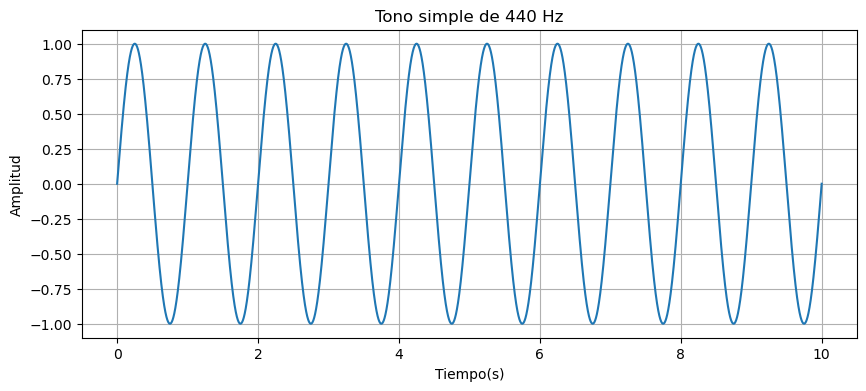

In [41]:
#Definicion de parametros del tono
frecuencia = 1 #Frecuencia en Hz
duracion = 10#Duracion del tono
tasa_muestreo =1000000#Taza de muestreo en Hz

tiempo = np.linspace(0,duracion, duracion * tasa_muestreo, endpoint=False)

#Generacion de la señal del tono como una onda sinusoidal 
tono = np.sin(2 * np.pi * frecuencia * tiempo)

#Visualizacion de la forma de onda del tono
plt.figure(figsize=(10,4))
plt.plot(tiempo, tono)
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.title("Tono simple de 440 Hz")
plt.grid(True)
plt.show()

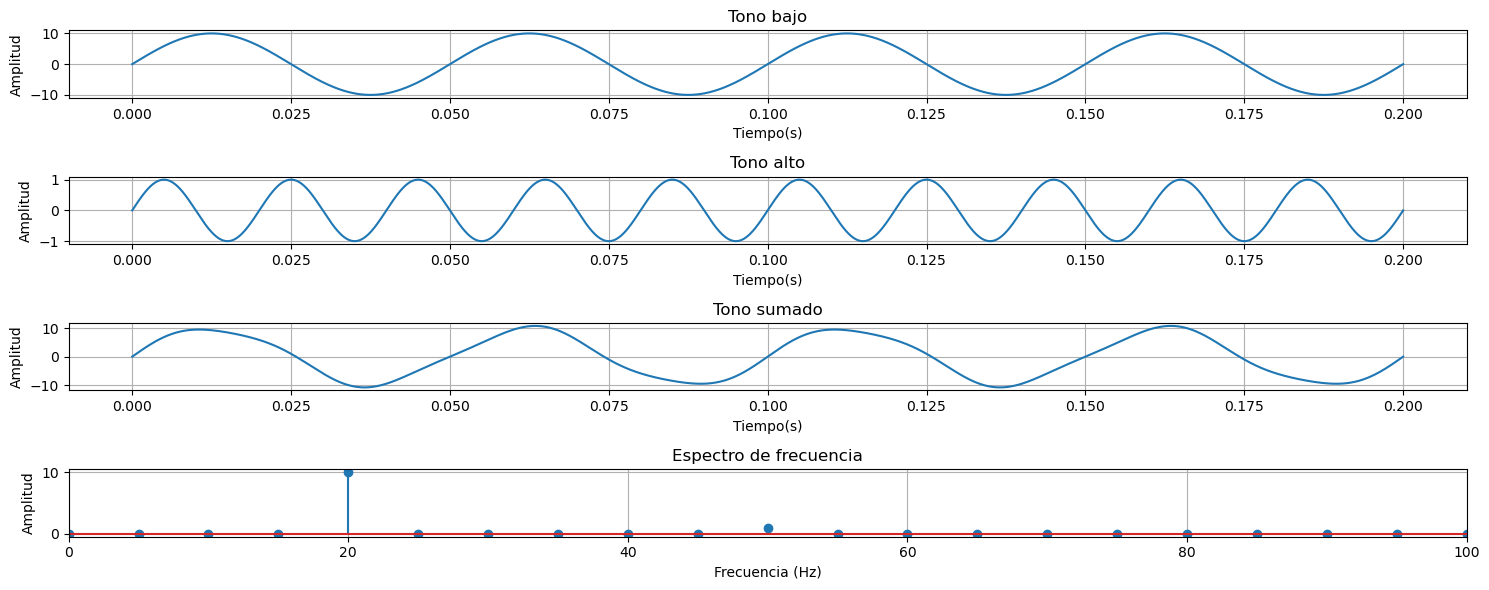

In [42]:
#Definimos parametros de la señal 
duracion = 5 #Duracion de la señal en segundos 
tasa_muestreo = 44100  #Taza de muestreo en Hz

#Generacion del vector de tiempo 
tiempo = np.linspace(0,2 * ( 1 / 10),tasa_muestreo)

#Definimos frecuencias de los tonos 
frecuencia_baja = 20
frecuencia_alta = 50


#Generamos los dos tonos simples
tono_bajo = 10 * np.sin( 2 * np.pi * frecuencia_baja * tiempo)
tono_alto = np.sin( 2 * np.pi * frecuencia_alta * tiempo)
senal_sumada = tono_bajo + tono_alto

#Calculo de la transformada de Fourier de la señal combinada 
fft_resultado = fft(senal_sumada)
fft_resultado = fft_resultado / (tasa_muestreo / 2)
frecuencias = np.fft.fftfreq(len(tiempo), d = tiempo[1] - tiempo[0])

#Visualizacion cada tono por separado incluyendo el espectro de frecuencias 
plt.figure(figsize = (15,6))

#Tono bajo 
plt.subplot(4,1,1)
plt.plot(tiempo, tono_bajo)
plt.title("Tono bajo")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.grid(True)

#Tono alto 
plt.subplot(4,1,2)
plt.plot(tiempo, tono_alto)
plt.title("Tono alto")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.grid(True)

#Suma de tonos
plt.subplot(4,1,3)
plt.plot(tiempo, senal_sumada)
plt.title("Tono sumado")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.grid(True)

#Visualizacion del espectro de frecuencias 
plt.subplot(4,1,4)
plt.stem(frecuencias[:len(frecuencias)//2], np.abs(fft_resultado)[:len(fft_resultado)//2])
plt.title("Espectro de frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, frecuencia_alta * 2)
plt.grid(True)


plt.tight_layout()
plt.show()

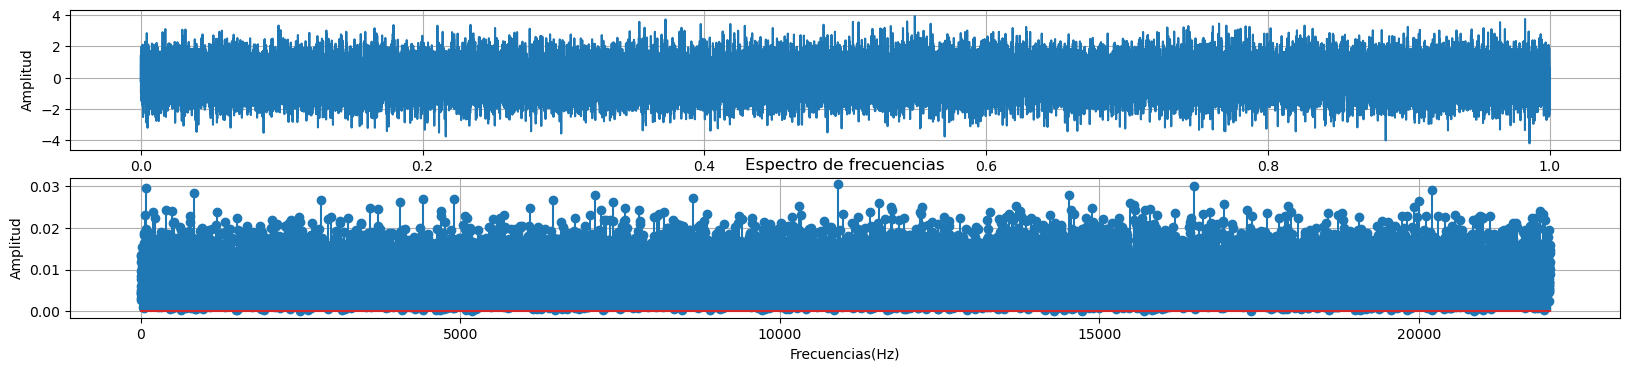

In [43]:
#Ruido blanco 
# Parámetros de la señal
frecuencia = 4 # Frecuencia en Hz
duracion = 1  # Duración en segundos
tasa_muestreo = 44100  # Tasa de muestreo en Hz

tiempo = np.linspace(0,duracion, tasa_muestreo, endpoint = False)
ruido_blanco = np.random.normal(0,1,len(tiempo))

#Calculamos las frecuencias correspondientes 
fft_resultado = fft(ruido_blanco)
fft_resultado /= (tasa_muestreo / 2)
frecuencias = np.fft.fftfreq(len(tiempo), d=1/tasa_muestreo)

#Visualizacion del ruido blanco 
plt.figure(figsize = (20,4))

#Visualizacion del ruido blanco 
plt.subplot(2,1,1)
plt.plot(tiempo, ruido_blanco)
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.grid(True)

#Visualizacion del espectro de frecuencias 
plt.subplot(2,1,2)
plt.stem(frecuencias[:len(frecuencias)//2],np.abs(fft_resultado)[:len(fft_resultado)//2])
plt.xlabel("Frecuencias(Hz)")
plt.ylabel("Amplitud")
plt.title("Espectro de frecuencias")
plt.grid(True)


plt.show()

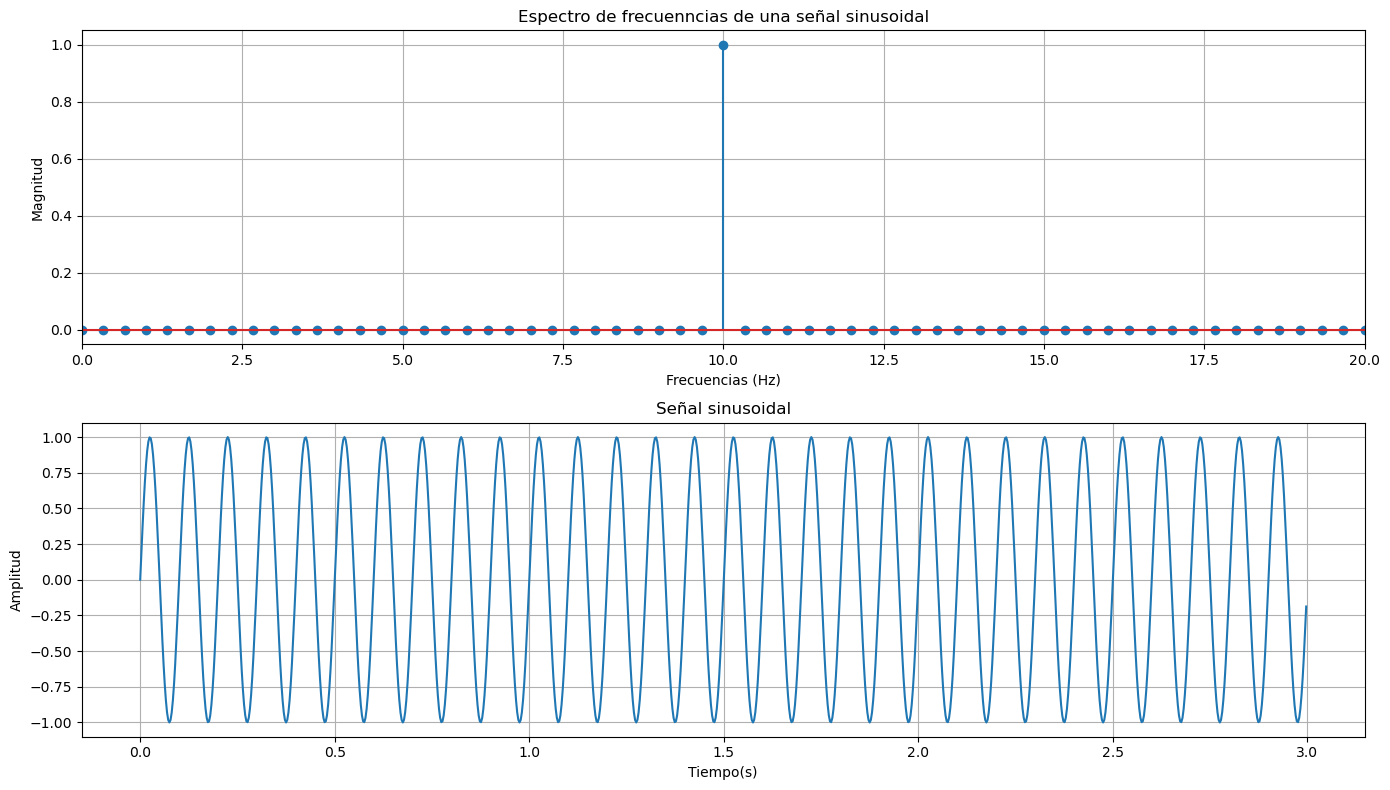

In [44]:
#Parametros de la señal
frecuencia = 10
duracion = 3
tasa_muestreo = 1000

#Vector de tiempo
tiempo = np.linspace(0,duracion, tasa_muestreo, endpoint = False)

#Generacion de señal sinuidal 
senal = np.sin(2 * np.pi * frecuencia * tiempo)

#Transformada de fourier 
transformada = np.fft.fft(senal)
transformada /= (tasa_muestreo / 2)
frecuencias = np.fft.fftfreq(len(transformada), d = tiempo[1] - tiempo[0])

plt.figure(figsize = (14,8))

#Visualizacion del espectro de frecuencias 
plt.subplot(2,1,1)
plt.stem(frecuencias[:len(frecuencias)//2], np.abs(transformada)[:len(transformada)//2])
plt.title("Espectro de frecuenncias de una señal sinusoidal")
plt.xlabel("Frecuencias (Hz)")
plt.ylabel("Magnitud")
plt.xlim(0, frecuencia * 2)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(tiempo,senal)
plt.title("Señal sinusoidal")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.grid(True)

plt.tight_layout()
plt.show()

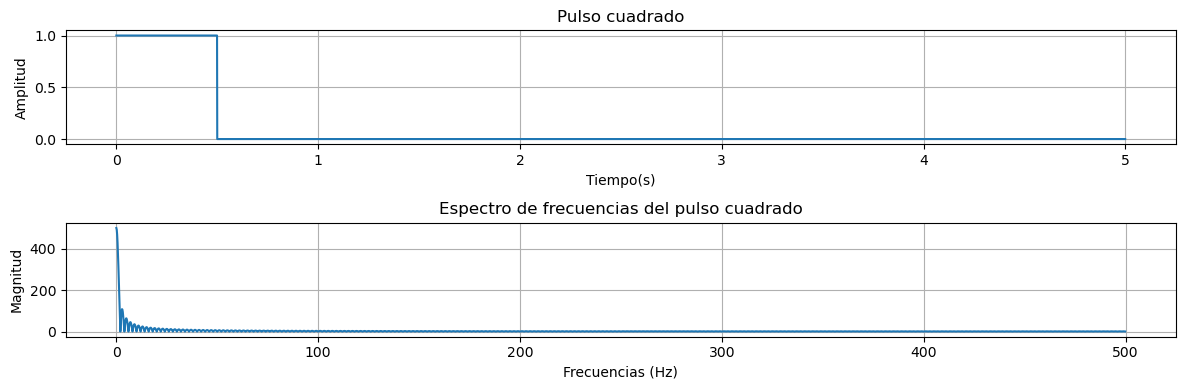

In [45]:
duracion = 5
tasa_muestreo = 1000

tiempo = np.linspace(0,duracion,duracion * tasa_muestreo, endpoint= False)

senal = np.where(tiempo < 0.5, 1,0)

transformada = np.fft.fft(senal)
frecuencias = np.fft.fftfreq(len(transformada),d = 1 / tasa_muestreo)

plt.figure(figsize = (12,4))

plt.subplot(2,1,1)
plt.plot(tiempo,senal)
plt.title("Pulso cuadrado")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.grid(True)


plt.subplot(2,1,2)
plt.plot(frecuencias[:len(frecuencias)//2], np.abs(transformada)[:len(transformada)//2])
plt.title("Espectro de frecuencias del pulso cuadrado")
plt.xlabel("Frecuencias (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)

plt.tight_layout()
plt.show()

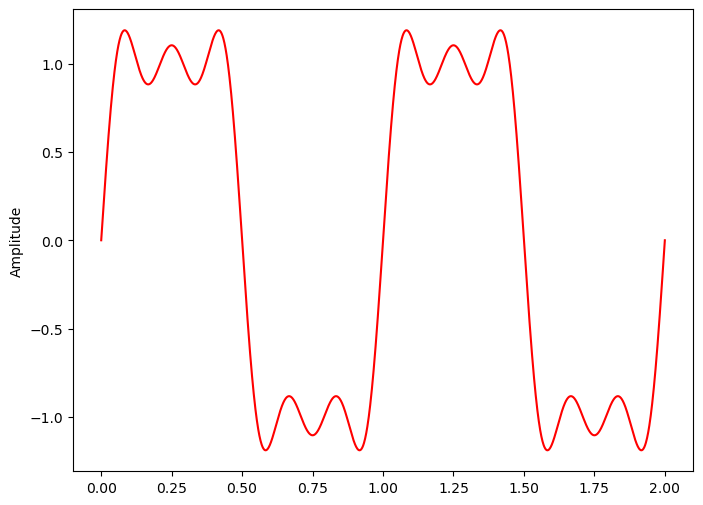

In [46]:
import matplotlib.pyplot as plt 
import numpy as np

#sample rate 
sr = 2000
ts = 1.0 / sr
#Frequency
freq = 1
#axe t 
t =  np.linspace(0, 2 * (1 / freq), sr)
#Amplitud 
A = 4 / np.pi
#Func
x = A  * np.sin(2 * np.pi * freq * t)
x +=  A * (1 / 3) * np.sin(2 * np.pi * freq * 3 * t)
x +=  A * (1 / 5) * np.sin(2 * np.pi * freq * 5 * t)

plt.figure(figsize= (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.show()

/home/kinlo/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/kinlo/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


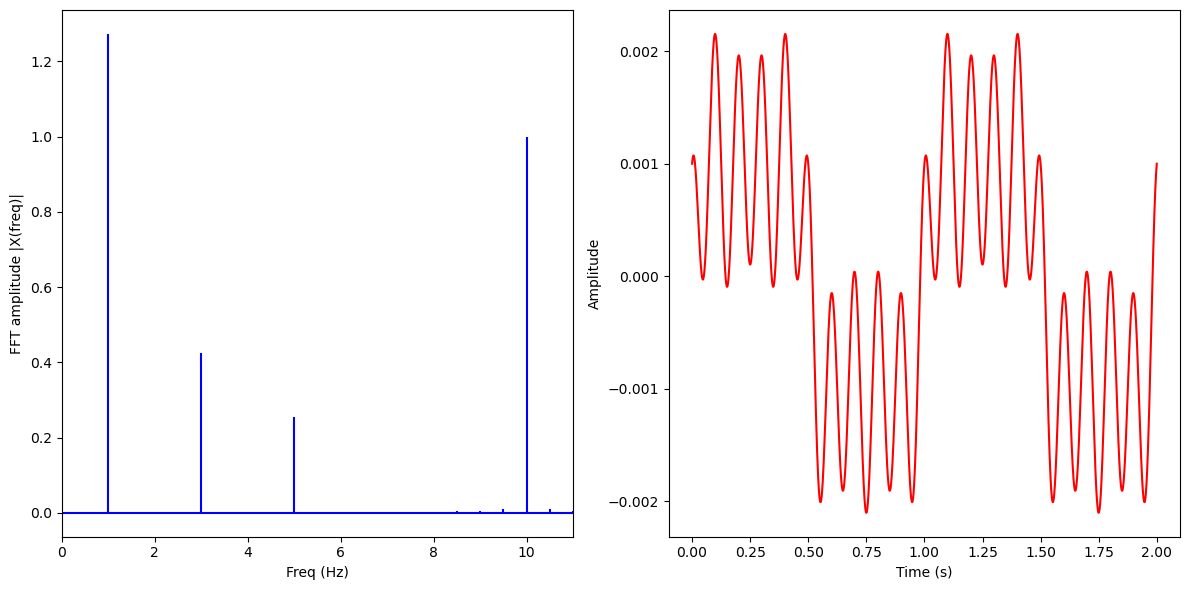

In [47]:
import matplotlib.pyplot as plt 
import numpy as np
from numpy.fft import fft, ifft

# sample rate 
sr = 2000
ts = 1.0 / sr

# Frecuencias
freq1 = 1
freq2 = 3
freq3 = 5
freq4 = 10
# Eje t 
t = np.linspace(0, 2 * (1 / freq1), sr)

# Amplitud 
A = 4 / np.pi

# Función
x = A * np.sin(2 * np.pi * freq1 * t)
x += A * (1 / 3) * np.sin(2 * np.pi * freq2 * t)
x += A * (1 / 5) * np.sin(2 * np.pi * freq3 * t)
x += np.cos(2 * np.pi * freq4 * t)

X = fft(x)
X /= (sr / 2)
N = len(X)
n = np.arange(N)
T = N / sr
freq = n / T 
freq /= 2
freq_lim = max([freq1, freq2, freq3, freq4]) + 1

plt.figure(figsize=(12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', basefmt="-b", \
         markerfmt=' ')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT amplitude |X(freq)|')
plt.xlim(0, freq_lim)  

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()



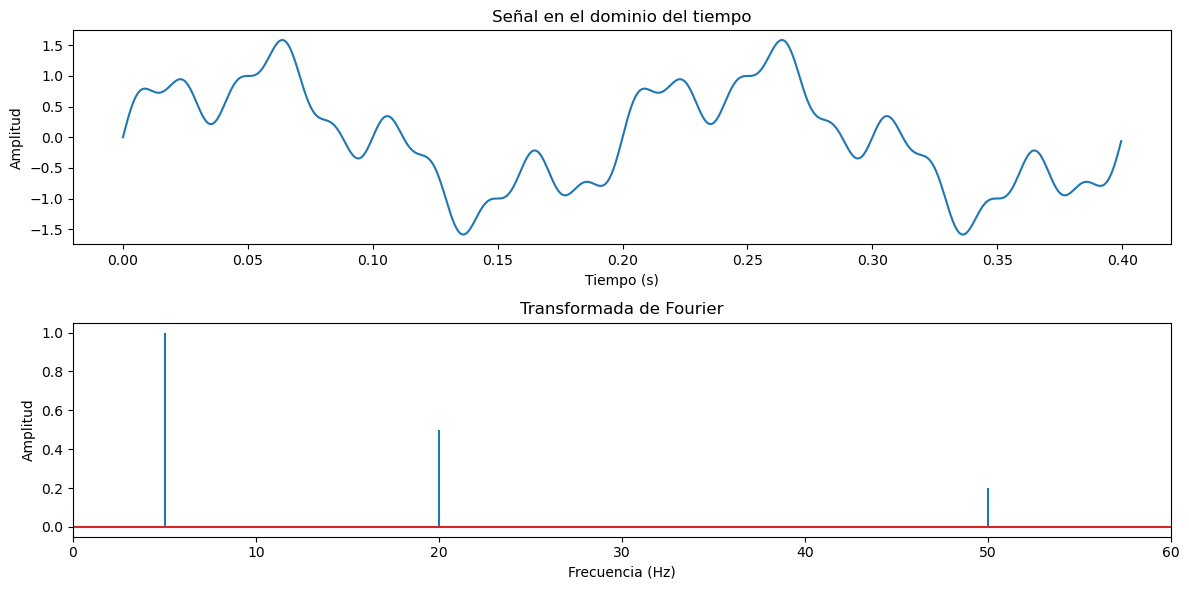

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Crear una señal de ejemplo
t = np.linspace(0, 2 * (1/5), 1000, endpoint=False)  # Vector de tiempo de 0 a 1 segundos
frequencies = [5, 20, 50]  # Frecuencias de las componentes sinusoidales
amplitudes = [1, 0.5, 0.2]  # Amplitudes de las componentes sinusoidales
signal = np.sum([amplitude * np.sin(2 * np.pi * frequency * t) for frequency, amplitude in zip(frequencies, amplitudes)], axis=0)

# Calcular la transformada de Fourier discreta
fft_result = np.fft.fft(signal)
fft_result /= (500)

# Calcular las frecuencias correspondientes a los coeficientes de la transformada
frequencies_fft = np.fft.fftfreq(len(signal), d=t[1]-t[0])
#Retorna de +F hasta -F
# Graficar la señal y su transformada de Fourier
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Señal en el dominio del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.stem(frequencies_fft[0:len(frequencies_fft)//2], np.abs(fft_result)[0:len(fft_result)//2],\
         markerfmt=' ')
plt.title('Transformada de Fourier')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, max(frequencies) + 10)

plt.tight_layout()
plt.show()

In [49]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os 
import glob

#Ruta de la carpeta que contiene los audios 
carpeta_audios = "/home/kinlo/Desktop/Proyecto/Proyecto/Recursos_dig/Drone/*"

#Patron para buscar archivos de audio dentro de la carpeta 
patron_audio = ".wav"

#Lista para almacenar info del audio 
lista_audios = []

#Iterar sobre todos los archivos de audio en la carpeta 
for archivo_audio in glob.glob(carpeta_audios):
    #Cargar el audio y su tasa de muestreo
    audio, sr = librosa.load(archivo_audio)
    #Agregar el nombre del archivo, tasa muestreo y su duración a la lista 
    duration = librosa.get_duration(y=audio, sr=sr)
    name = archivo_audio.split("/")[-1]
    if duration > 1:
        audio, sr = librosa.load(archivo_audio, duration=1)
        duration = librosa.get_duration(y=audio, sr=sr)
        lista_audios.append((name, sr, duration))
    else:
        os.remove(archivo_audio)

#Visualización de los datos
for audio_info in lista_audios:
    print(f"Nombre del archivo: {audio_info[0]}\n",
    f"Tasa de muestreo: {audio_info[1]}\n",
    f"Duracion: {audio_info[2]}\n")

print(len(lista_audios))




0


In [50]:
"""
Para instalar el repositorio usa 
direccionPythonUsando pip install ucimlrepo
"""

from ucimlrepo import fetch_ucirepo 
import numpy as np  
import random as rd
import math
from statistics import mode 

# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
x = iris.data.features #Caracteristicas 
y = iris.data.targets  #Objetivos

clases_iris = [] #Guardar todos los objetivos
for i in np.unique(y.values):
    print(i)
    clases_iris.append(i)

fila = 2        #rd.randint(0,149) #Random de 0 a 149
#sintaxis ->    DataFrame.iloc[fila,columna] 


d_i = []        #Guardaremos aqui las distancias

for i in range(150):
    distancia = 0
    for j in range(4):
        distancia += (x.iloc[fila,j] - x.iloc[i,j]) ** 2
    distancia **= 1/2
    d_i.append(distancia)
d_i.sort()
k = 5
kNN = []
for i in range(1,k+1):
    kNN.append(d_i[i])

print(kNN)
mode(kNN)

Iris-setosa
Iris-versicolor
Iris-virginica
[0.14142135623730978, 0.24494897427831802, 0.264575131106459, 0.264575131106459, 0.264575131106459]


0.264575131106459

In [51]:
#Verificar la instalación de ucimlrepo
#Deberia de funcionar lo siguiente por defecto
#en la terminal -> pip install ucimlrepo
#o en caso de fallo 
#./ruta_instalacion_Python pip install ucimlrepo
try:
    from ucimlrepo import fetch_ucirepo 
    import pandas as pd
    import numpy as np  
    import random 
    from scipy.stats import mode
except ImportError:
    import subprocess
    import sys
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'ucimlrepo', 'pandas', 'numpy', 'scipy'])
    # Una vez instaladas las bibliotecas, intenta importarlas nuevamente
    from ucimlrepo import fetch_ucirepo 
    import pandas as pd
    import numpy as np  
    from scipy.stats import mode

#Configuraciones para no truncar la salida  ***************
pd.set_option('display.max_rows', None)

#sintaxis ->    DataFrame.iloc[fila,columna] 

# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
data_num = iris.data.features #Caracteristicas 
data_label = iris.data.targets  #Objetivos

#Porcentaje 50 
percent_query = 20
total = len(data_num)
k = 3
#Datos 

#Query
nume_samples_query = int((len(data_num) * percent_query)/100)                       #Numero de muestras con respecto al porcentanje         
query_index_samples = random.sample(list(range(0,149)),nume_samples_query)          #Escogemos los indices de query aleatoriamente sin remplazo
query_index_samples.sort()                                                          #Ordenamos 
query_samples = data_num.iloc[query_index_samples]                                  #seleccionamos de data_num con respecto a los indices encontrados 
#    Training
#Agregar inplace como True para eliminar de la original 
training_samples = data_num.drop(query_index_samples)                               #Escogemos los indices faltantes

#Label 
query_samples_label = data_label.iloc[query_index_samples]                          #iloc -> [] usando los indices antes encontrados para query
training_samples_label = data_label.drop(query_index_samples)                       #Escogemos los indices faltantes 


cols_dn = len(data_num.columns)                                                     #Columnas de data_num
size_ts = len(training_samples)                                                     #Size de training_samples
size_q  = len(query_samples)                                                        #Size de query
k_DI = []                                                                           #Aqui se almacenan las k distancias mas pequeñas                                                                             #
for j in range(size_q):                                                             #iteramos por todos los elementos de la query
    Q = np.tile(query_samples.iloc[j,:],(training_samples.shape[0],1))              #Igual que 'repmat'
    Z = Q - training_samples                                                        #
    S_with_garbage = Z @ Z.T                                                        #puede usar tambien np.dot(m1,m2)
    distancia_S = np.diag(S_with_garbage) ** (1 / 2)                                #Obtener la diagonal y elevar sus elem a 1/2
    
    sort_index = np.argsort(distancia_S)                                            #Obtener los indices ordenados
    
    k_index = sort_index[:k]                                                        #Seleccionamos los k primeros
    k_dis = distancia_S[k_index]                                                    #Almacenamos las k distancias minimas

    mode_k_dis = mode(k_dis)[0]                                                     #mode retorna (moda, repeticiones)
    index_mode = np.where(distancia_S == mode_k_dis)[0][0]                          #buscamos indice en distancia_S de mode_k_dis
    """
    index_mode1 = 0                                                                 #La primera forma que se me ocurrio de hacerlo
    for i in k_index:                                                               #luego encontre la solución de arriba
        if distancia_S[i] == mode_k_dis:
            index_mode = i
            break
    print(distancia_S[index_mode],distancia_S[index_mode1])
    """
    k_DI.append(index_mode) 

contError = 0
for i in range(len(query_samples_label)):
    print(f"Label {i} en query:{query_samples_label.iloc[i]}")
    print(f"Valor dado por kNN:{training_samples_label.iloc[k_DI[i]]}\n")
    if str(query_samples_label.iloc[i]) != str(training_samples_label.iloc[k_DI[i]]):
        contError += 1

percent_success = (total - contError) * (100 / total)

Label 0 en query:class    Iris-setosa
Name: 8, dtype: object
Valor dado por kNN:class    Iris-setosa
Name: 38, dtype: object

Label 1 en query:class    Iris-setosa
Name: 11, dtype: object
Valor dado por kNN:class    Iris-setosa
Name: 29, dtype: object

Label 2 en query:class    Iris-setosa
Name: 17, dtype: object
Valor dado por kNN:class    Iris-setosa
Name: 0, dtype: object

Label 3 en query:class    Iris-setosa
Name: 18, dtype: object
Valor dado por kNN:class    Iris-setosa
Name: 5, dtype: object

Label 4 en query:class    Iris-setosa
Name: 27, dtype: object
Valor dado por kNN:class    Iris-setosa
Name: 0, dtype: object

Label 5 en query:class    Iris-setosa
Name: 28, dtype: object
Valor dado por kNN:class    Iris-setosa
Name: 0, dtype: object

Label 6 en query:class    Iris-setosa
Name: 30, dtype: object
Valor dado por kNN:class    Iris-setosa
Name: 9, dtype: object

Label 7 en query:class    Iris-setosa
Name: 33, dtype: object
Valor dado por kNN:class    Iris-setosa
Name: 32, dtype

In [52]:
print(f"Porcentaje query: {percent_query}\n",
    f"Porcentaje exito: {percent_success}\n",
    f"k: {k}\n", sep="")


Porcentaje query: 20
Porcentaje exito: 80.0
k: 3

